In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
import urllib.request as url

import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if 'GPU' not in device_name:
  print('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/train_df.csv', sep = ',', index_col = 0)
validation_df = pd.read_csv('/content/drive/MyDrive/validation_df.csv', sep = ',', index_col = 0)
test_df = pd.read_csv('/content/drive/MyDrive/test_df.csv', sep = ',', index_col = 0)

In [5]:
train_df = train_df[train_df.finding_labels != 'No Finding']
validation_df = validation_df[validation_df.finding_labels != 'No Finding']
test_df = test_df[test_df.finding_labels != 'No Finding']

In [6]:
infiltration, _ = train_test_split(train_df[train_df.finding_labels == 'Infiltration'], test_size = 0.94)
atelectasis, _ = train_test_split(train_df[train_df.finding_labels == 'Atelectasis'], test_size = 0.85)
effusion, _ = train_test_split(train_df[train_df.finding_labels == 'Effusion'], test_size = 0.85)
nodule, _ = train_test_split(train_df[train_df.finding_labels == 'Nodule'], test_size = 0.78)
pneumothorax, _ = train_test_split(train_df[train_df.finding_labels == 'Pneumothorax'], test_size = 0.72)
consolidation, _ = train_test_split(train_df[train_df.finding_labels == 'Consolidation'], test_size = 0.55)
pleural_thickening, _ = train_test_split(train_df[train_df.finding_labels == 'Pleural_Thickening'], test_size = 0.45)
emphysema, _ = train_test_split(train_df[train_df.finding_labels == 'Emphysema'], test_size = 0.32)
fibrosis, _ = train_test_split(train_df[train_df.finding_labels == 'Fibrosis'], test_size = 0.16)  
edema = train_df[train_df.finding_labels == 'Edema']   
train_df = pd.concat([infiltration, atelectasis, effusion, nodule, pneumothorax, consolidation,
                   pleural_thickening, emphysema, fibrosis, edema])
train_df['finding_labels'].value_counts()      

Atelectasis           585
Edema                 578
Pneumothorax          566
Pleural_Thickening    565
Fibrosis              563
Emphysema             556
Consolidation         550
Nodule                549
Effusion              546
Infiltration          526
Name: finding_labels, dtype: int64

In [7]:
infiltration, _ = train_test_split(validation_df[validation_df.finding_labels == 'Infiltration'], test_size = 0.94)
atelectasis, _ = train_test_split(validation_df[validation_df.finding_labels == 'Atelectasis'], test_size = 0.85)
effusion, _ = train_test_split(validation_df[validation_df.finding_labels == 'Effusion'], test_size = 0.85)
nodule, _ = train_test_split(validation_df[validation_df.finding_labels == 'Nodule'], test_size = 0.78)
pneumothorax, _ = train_test_split(validation_df[validation_df.finding_labels == 'Pneumothorax'], test_size = 0.72)
consolidation, _ = train_test_split(validation_df[validation_df.finding_labels == 'Consolidation'], test_size = 0.55)
pleural_thickening, _ = train_test_split(validation_df[validation_df.finding_labels == 'Pleural_Thickening'], test_size = 0.45)
emphysema, _ = train_test_split(validation_df[validation_df.finding_labels == 'Emphysema'], test_size = 0.32)
fibrosis, _ = train_test_split(validation_df[validation_df.finding_labels == 'Fibrosis'], test_size = 0.16)  
edema = validation_df[validation_df.finding_labels == 'Edema']   
validation_df = pd.concat([infiltration, atelectasis, effusion, nodule, pneumothorax, consolidation,
                   pleural_thickening, emphysema, fibrosis, edema])
validation_df['finding_labels'].value_counts()      

Edema                 35
Emphysema             31
Pleural_Thickening    31
Effusion              29
Atelectasis           29
Infiltration          29
Fibrosis              28
Nodule                26
Pneumothorax          25
Consolidation         24
Name: finding_labels, dtype: int64

In [8]:
infiltration, _ = train_test_split(test_df[test_df.finding_labels == 'Infiltration'], test_size = 0.94)
atelectasis, _ = train_test_split(test_df[test_df.finding_labels == 'Atelectasis'], test_size = 0.85)
effusion, _ = train_test_split(test_df[test_df.finding_labels == 'Effusion'], test_size = 0.85)
nodule, _ = train_test_split(test_df[test_df.finding_labels == 'Nodule'], test_size = 0.78)
pneumothorax, _ = train_test_split(test_df[test_df.finding_labels == 'Pneumothorax'], test_size = 0.72)
consolidation, _ = train_test_split(test_df[test_df.finding_labels == 'Consolidation'], test_size = 0.55)
pleural_thickening, _ = train_test_split(test_df[test_df.finding_labels == 'Pleural_Thickening'], test_size = 0.45)
emphysema, _ = train_test_split(test_df[test_df.finding_labels == 'Emphysema'], test_size = 0.32)
fibrosis, _ = train_test_split(test_df[test_df.finding_labels == 'Fibrosis'], test_size = 0.16)  
edema = test_df[test_df.finding_labels == 'Edema']   
test_df = pd.concat([infiltration, atelectasis, effusion, nodule, pneumothorax, consolidation,
                   pleural_thickening, emphysema, fibrosis, edema])
test_df['finding_labels'].value_counts()      

Pneumothorax          22
Pleural_Thickening    22
Emphysema             19
Nodule                18
Fibrosis              18
Atelectasis           17
Infiltration          17
Effusion              16
Edema                 15
Consolidation         13
Name: finding_labels, dtype: int64

In [9]:
atelectasis = train_df[train_df.finding_labels == 'Atelectasis']
atelectasis['class_name'] =  1
others = train_df[train_df.finding_labels != 'Atelectasis']
others = train_df[train_df.finding_labels != 'No finding']
others['class_name'] = 0
others , _ = train_test_split(others, test_size = 0.9, random_state = 42, 
                               shuffle = True, stratify = others['finding_labels'])
train_df_ = pd.concat([atelectasis, others])

In [10]:
atelectasis = validation_df[validation_df.finding_labels == 'Atelectasis']
atelectasis['class_name'] =  1
others = validation_df[validation_df.finding_labels != 'Atelectasis']
others = validation_df[validation_df.finding_labels != 'No finding']
others['class_name'] = 0
others , _ = train_test_split(others, test_size = 0.9, random_state = 42, 
                               shuffle = True, stratify = others['finding_labels'])
validation_df_ = pd.concat([atelectasis, others])

In [11]:
atelectasis = test_df[test_df.finding_labels == 'Atelectasis']
atelectasis['class_name'] =  1
others = test_df[test_df.finding_labels != 'Atelectasis']
others = test_df[test_df.finding_labels != 'No finding']
others['class_name'] = 0
others , _ = train_test_split(others, test_size = 0.9, random_state = 42, 
                               shuffle = True, stratify = others['finding_labels'])
test_df_ = pd.concat([atelectasis, others])

In [12]:
image_generator = ImageDataGenerator(rescale = 1/255, samplewise_center = True, 
                                     samplewise_std_normalization = True,
                                     horizontal_flip = True,
                                     vertical_flip = False,
                                     height_shift_range = 0.05,
                                     width_shift_range = 0.1,
                                     rotation_range = 5,
                                     shear_range = 0.1,
                                     fill_mode = 'reflect',
                                     zoom_range = 0.15)

train_generator = image_generator.flow_from_dataframe(
                                                      dataframe = train_df_,
                                                      directory = '',
                                                      x_col = 'Image Index',
                                                      y_col = 'class_name',
                                                      batch_size = 32,
                                                      seed = 42,
                                                      shuffle = True,
                                                      class_mode = 'raw',
                                                      target_size = (256, 256))

test_datagen = ImageDataGenerator(samplewise_center = True, 
                                  samplewise_std_normalization = True)

valid_generator = test_datagen.flow_from_dataframe(
                                                      dataframe = validation_df_,
                                                      directory = '.', 
                                                      x_col = 'Image Index',
                                                      y_col = 'class_name',
                                                      batch_size = 32,
                                                      seed = 42,
                                                      shuffle = True,
                                                      class_mode = 'raw',
                                                      target_size = (256, 256))

test_generator = test_datagen.flow_from_dataframe(
                                                  dataframe = test_df_, 
                                                  directory = '.',
                                                  x_col = 'Image Index',
                                                  y_col = 'class_name',
                                                  batch_size = 32,
                                                  seed = 42,
                                                  shuffle = True,
                                                  class_mode = 'raw',
                                                  target_size = (256, 256))

Found 1143 validated image filenames.
Found 57 validated image filenames.
Found 34 validated image filenames.


In [13]:
model = MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = 'imagenet')
x = tf.keras.layers.GlobalAveragePooling2D()(model.output)
x = tf.keras.layers.Dense(units = 1, activation = 'sigmoid')(x)

model = tf.keras.models.Model(inputs = model.input, outputs = x)

In [14]:
filepath = "/content/drive/MyDrive/experimentos/multilabel/atelectasis/transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

In [15]:
callbacks = [checkpoint]

In [16]:
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.0001), loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [18]:
history = model.fit(train_generator, steps_per_epoch = 1143 // 32, 
                    validation_data = valid_generator, validation_steps = 57 // 32,
                    callbacks = callbacks, epochs = 20)

Epoch 1/20
35/35 [==============================] - 588s 17s/step - loss: 0.6800 - acc: 0.5968 - val_loss: 0.7124 - val_acc: 0.5625

Epoch 00001: val_acc improved from -inf to 0.56250, saving model to /content/drive/MyDrive/experimentos/multilabel/atelectasis/transferlearning_weights.hdf5
Epoch 2/20
35/35 [==============================] - 30s 855ms/step - loss: 0.6306 - acc: 0.6517 - val_loss: 0.7446 - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.56250
Epoch 3/20
35/35 [==============================] - 30s 858ms/step - loss: 0.5928 - acc: 0.6931 - val_loss: 0.8197 - val_acc: 0.5000

Epoch 00003: val_acc did not improve from 0.56250
Epoch 4/20
35/35 [==============================] - 30s 856ms/step - loss: 0.5491 - acc: 0.7138 - val_loss: 0.7123 - val_acc: 0.5625

Epoch 00004: val_acc did not improve from 0.56250
Epoch 5/20
35/35 [==============================] - 30s 855ms/step - loss: 0.5074 - acc: 0.7534 - val_loss: 0.7267 - val_acc: 0.5938

Epoch 00005: val_acc imp

In [26]:
model.load_weights('/content/drive/MyDrive/experimentos/multilabel/atelectasis/transferlearning_weights.hdf5')
model.evaluate(test_generator)

2/2 [==============================] - 1s 10ms/step - loss: 1.0613 - acc: 0.5588


[1.0613316297531128, 0.5588235259056091]

In [27]:
(x,y) = test_generator[0]

In [28]:
predict = model.predict(x)

In [29]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

def thresholds(limiar, predict):
  '''predição para diferentes thresholds'''

  predict_ = []
  for i in predict:
    if i > limiar:
      predict_.append(1)
    else:
      predict_.append(0)
  
  return predict_

def precision_recall_accuracy_curve(predict, y):
  ''' Relaciona a curva da Precisão, Sensibilidade e Acurácia em relação a diferentes Thresholds'''

  limiares = np.arange(0, 1, 0.05)
  predicts = []
  precisions = []
  recalls = []
  accuracy = []
  flag = 0
  for i in limiares:
    predicts.append(thresholds(i, predict))
    precisions.append(precision_score(predicts[flag], y))
    recalls.append(recall_score(predicts[flag], y))
    accuracy.append(accuracy_score(predicts[flag], y))
    flag += 1
  
  return precisions, recalls, accuracy

def plot_precision_recall_accuracy_curve(precisions, recalls, accuracy):
  '''Plotando a curva de Precisão, Sensibilidade e Acurácia'''

  plt.figure(figsize = (10,5))
  plt.plot(np.arange(0, 1, 0.05), precisions, label = 'Precision')
  plt.plot(np.arange(0, 1, 0.05), recalls, label = 'Recall')
  plt.plot(np.arange(0, 1, 0.05), accuracy, label = 'Accuracy')
  plt.title('Precisão, Sensibilidade e Acurácia para diferentes Thresholds')
  plt.xlabel('Thresholds')
  plt.legend()
  plt.savefig('curve-analysis')

  return None

def best_metrics(threshold, predict, y):
  '''Melhores valores para o threshold escolhido'''

  predict_ = thresholds(threshold, predict)
  print('Matriz de Confusão:\n', confusion_matrix(predict_, y))
  print('Acurácia:', accuracy_score(predict_, y))
  print('Precisão', precision_score(predict_, y))
  print('Sensibilidade:', recall_score(predict_, y)) 
  print('F1_Score:', f1_score(predict_, y))

  return None

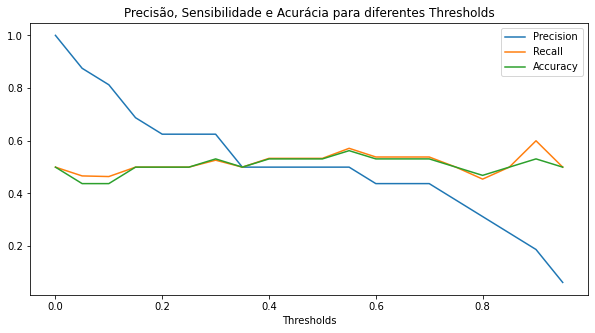

In [30]:
# plotando a curva da Precisão, Sensibilidade e Acurácia 
precisions, recalls, accuracy = precision_recall_accuracy_curve(predict, y)
plot_precision_recall_accuracy_curve(precisions, recalls, accuracy)

In [35]:
# analisando as melhores métricas encontradas para o modelo
best_metrics(threshold = 0.55, predict = predict, y = y)

Matriz de Confusão:
 [[10  8]
 [ 6  8]]
Acurácia: 0.5625
Precisão 0.5
Sensibilidade: 0.5714285714285714
F1_Score: 0.5333333333333333


In [36]:
model.save('/content/drive/MyDrive/experimentos/multilabel/atelectasis/model1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/experimentos/multilabel/atelectasis/model1/assets
